In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Lire les résultats depuis le fichier CSV
df = pd.read_csv("../ga_params_finetuning_results.csv")
print(df.head())

# Supprimer les espaces au début et à la fin des noms de colonnes
df.columns = df.columns.str.strip()

print(df.columns)

   entities   mr_switch   mr_move   mr_create   result
0        50           5        25           1   126155
1        50           5        15           1   129363
2        50           5        35           1   129481
3        50          15        15           1   130251
4        50           5         5           1   130614
Index(['entities', 'mr_switch', 'mr_move', 'mr_create', 'result'], dtype='object')


In [33]:

# Normaliser la taille des bulles pour éviter qu'elles ne deviennent trop grandes
# On divise par un facteur pour réduire la taille (ajustez selon vos besoins)
# sizes = df['entities'] / 2


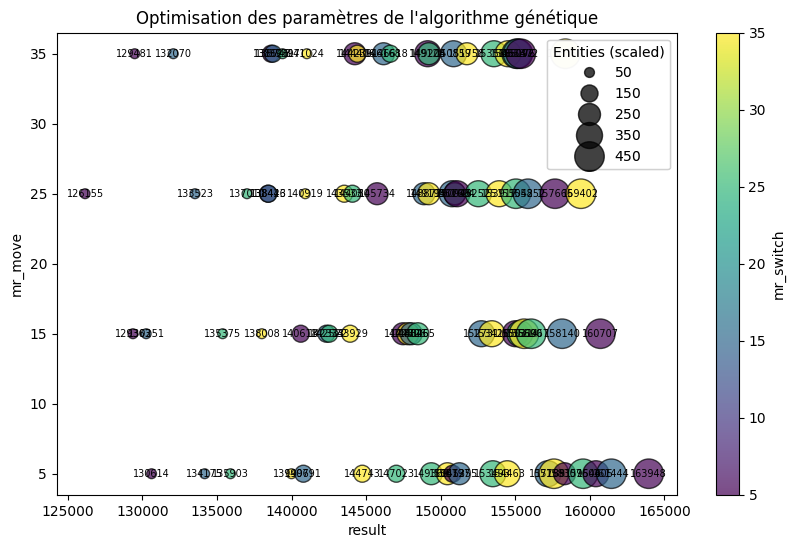

In [39]:

# Créer la figure et l'axe
fig, ax = plt.subplots(figsize=(10, 6))

# Créer le scatter plot (graphique à bulles)
scatter = ax.scatter(
    x=df['result'],
    y=df['mr_move'],
    s=df['entities'],
    c=df['mr_switch'],
    cmap='viridis',
    alpha=0.7,
    edgecolors="black"
)

# Ajouter les valeurs de 'result' au centre des bulles
for i, row in df.iterrows():
    ax.text(
        row['result'], row['mr_move'], str(row['result']),
        ha='center', va='center', color='black', fontsize=7
    )

# Ajouter une barre de couleur pour le 'result'
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('mr_switch')

# Ajouter des labels et un titre
ax.set_xlabel('result')
ax.set_ylabel('mr_move')
ax.set_title('Optimisation des paramètres de l\'algorithme génétique')

# Afficher la légende pour la taille des bulles
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.7)
legend2 = ax.legend(
    handles, labels,
    loc="upper right",
    title="Entities (scaled)"
)

# Ajouter une légende pour la taille des bulles
ax.add_artist(legend2)

# Afficher le graphique
plt.show()
